In [4]:
from sklearn.datasets import load_iris
import numpy as np

In [5]:
help(load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============

    Read more in the :ref:`User Guide <iris_dataset>`.

    .. versionchanged:: 0.20
        Fixed two wrong data points according to Fisher's paper.
        The new version is the same as in R, but not as in the UCI
        Machine Learning Repository.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.

 

In [6]:
load_iris()

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

nombre de lignes 

In [8]:
print(load_iris().data.shape[0])


150


nombre de variable numériques

In [9]:
print(load_iris().data.shape[1])

4


Noms des variables numériques

In [10]:
for i, nom in enumerate(load_iris().feature_names):
    print(f"  {i+1}. {nom}")

  1. sepal length (cm)
  2. sepal width (cm)
  3. petal length (cm)
  4. petal width (cm)


target

In [11]:
print(len(load_iris().target_names))

3


In [12]:
for i,nom in enumerate(load_iris().target_names):
    print(f"{i+1}.{nom}")

1.setosa
2.versicolor
3.virginica


combien d’individus dans chaque catégorie
unique = [0, 1, 2]
counts = [50, 50, 50]

In [16]:
unique, counts = np.unique(load_iris().target, return_counts=True)
for i, (cat, count) in enumerate(zip(unique, counts)):
    print(f"  - {load_iris().target_names[cat]} : {count} ")

  - setosa : 50 
  - versicolor : 50 
  - virginica : 50 


1.2 Visualiser les données


Text(0, 0.5, 'sepal width (cm)')

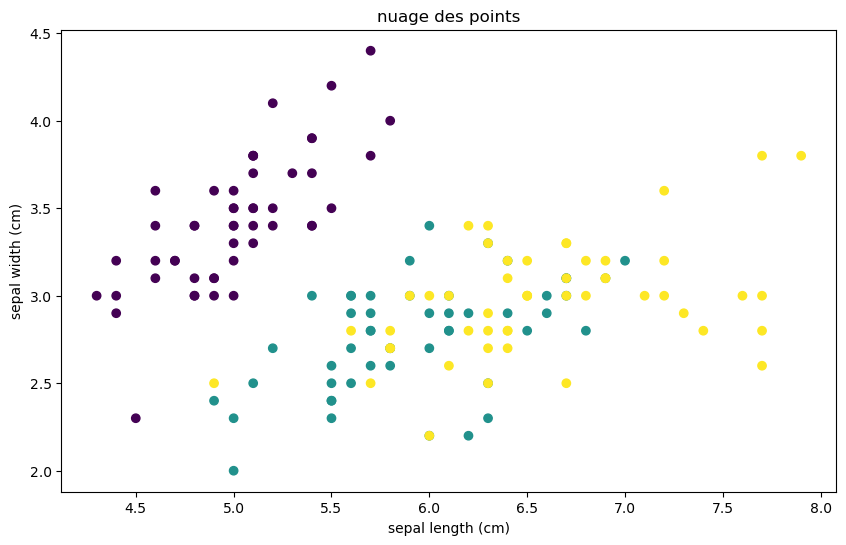

In [26]:
#2
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(load_iris().data[:,0], load_iris().data[:,1 ],
            c=load_iris().target )
plt.title("nuage des points")
plt.xlabel(load_iris().feature_names[0])
plt.ylabel(load_iris().feature_names[1])

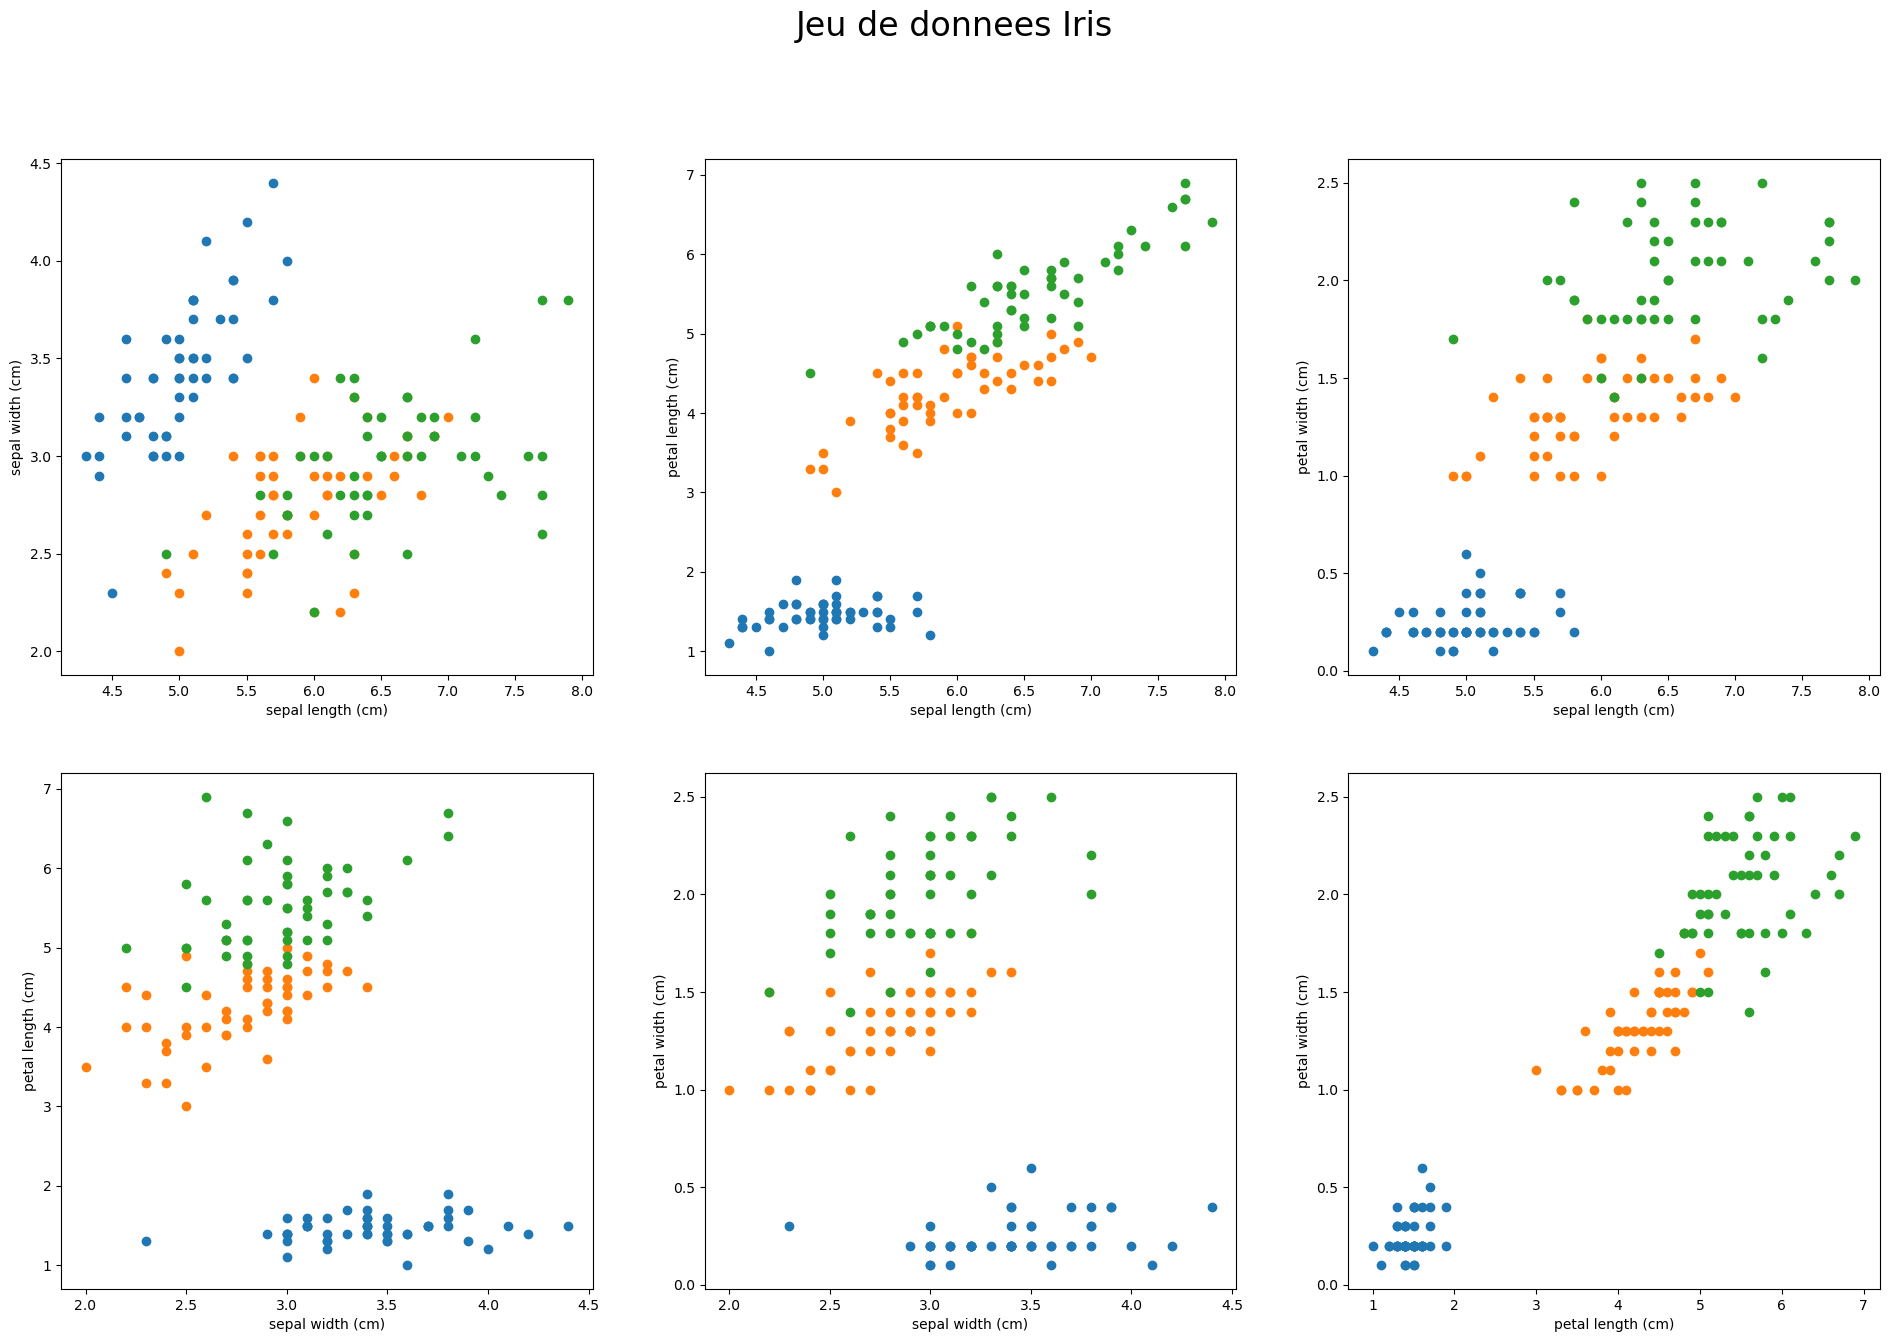

In [49]:
#3
import itertools

combinaisons = list(itertools.combinations(range(4),(2)))
fig,ax=plt.subplots(2,3,figsize=(20,14))
fig.suptitle ("Jeu de donnees Iris ", fontsize =24) 
fig.tight_layout ( pad =5)
ax = ax.ravel ()

for s,(var1,var2) in enumerate(combinaisons):
    for espece in range(3):
         indices = load_iris().target == espece
        
         ax[s].scatter(
            load_iris().data[indices, var1],  # variable sur l'axe X
            load_iris().data[indices, var2],  # variable sur l'axe Y
         )
         ax[s].set_xlabel(load_iris().feature_names[var1])
         ax[s].set_ylabel(load_iris().feature_names[var2])


fig.savefig("nuage_de_pts.png")

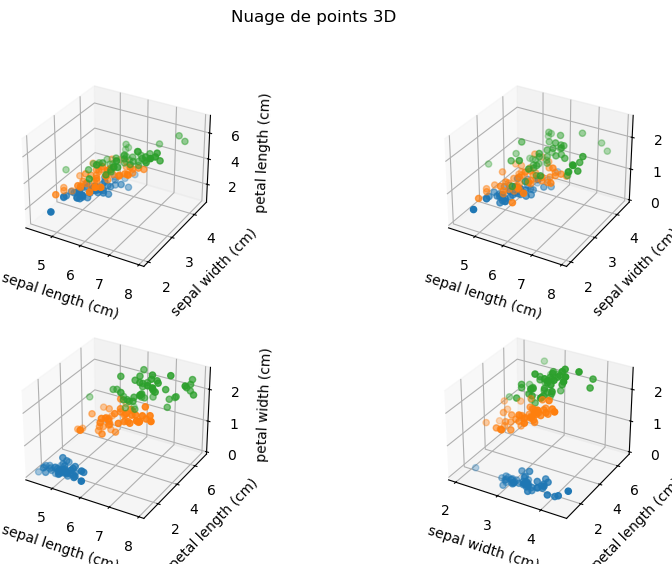

In [79]:
#5

combinaisons = list(itertools.combinations(range(4),(3)))
fig = plt.figure(figsize=(10,6))
fig.suptitle("Nuage de points 3D")
for si , (var1,var2,var3) in enumerate(combinaisons):
    ax = fig.add_subplot(2,2,si+1,projection='3d')
    for espece in range(3):
        indices = load_iris().target == espece  
        
        ax.scatter(
            load_iris().data[indices, var1],  # variable sur l'axe X
            load_iris().data[indices, var2],  # variable sur l'axe Y
            load_iris().data[indices, var3],  # variable sur l'axe Z
           
        )
        ax.set_xlabel(load_iris().feature_names[var1])
        ax.set_ylabel(load_iris().feature_names[var2])
        ax.set_zlabel(load_iris().feature_names[var3])

fig.savefig("nuage_3d")

2 Partie : données


In [68]:
import sqlite3 as sq
con = sq.connect("voitures.db")

In [75]:
cur = con.cursor()
cur.execute("CREATE TABLE Personnes (nom,prenom,age,revenus_annuels,id_voiture)")
cur.execute("CREATE TABLE Voitures(id_voiture,marque,prix)")

OperationalError: table Voitures already exists

In [78]:
cur.execute("ALTER TABLE Voitures ADD PRIMARY KEY (id_voiture)")
cur.execute("ALTER TABLE Personnes ADD CONSTRAINT FK_voiture FOREIGN KEY (id_voiture) references table Voitures")

OperationalError: near "PRIMARY": syntax error

In [81]:
cur.execute("ALTER TABLE Voitures RENAME TO voitures_old")
cur.execute("CREATE TABLE Voitures(id_voiture primary key,marque,prix)")

In [86]:
#cur.execute("ALTER TABLE Personnes RENAME TO personne_old")
cur.execute("CREATE TABLE Personnes (nom,prenom,age,revenus_annuels,id_voiture ,FOREIGN KEY (id_voiture) REFERENCES Voitures(id_voiture) )")

In [87]:
# Insertion de 4 marques
voitures = [
    (1, "Toyota"),
    (2, "BMW"),
    (3, "Renault"),
    (4, "Mercedes")
]

cur.executemany("INSERT INTO Voitures (id_voiture, marque) VALUES (?, ?)", voitures)

In [90]:
personnes = [
    # Toyota (id_voiture = 1)
    ("Dupont", "Alice", 25, 22000, 1),
    ("Martin", "Paul", 30, 25000, 1),
    ("Durand", "Sophie", 28, 23000, 1),
    ("Bernard", "Lucas", 35, 27000, 1),

    # BMW (id_voiture = 2)
    ("Moreau", "Emma", 40, 50000, 2),
    ("Lemoine", "Thomas", 38, 48000, 2),
    ("Fabre", "Julie", 45, 52000, 2),
    ("Roux", "Maxime", 50, 55000, 2),

    # Renault (id_voiture = 3)
    ("Gauthier", "Chloé", 22, 21000, 3),
    ("Lopez", "Nicolas", 29, 24000, 3),
    ("Mercier", "Emma", 27, 22000, 3),
    ("Blanc", "Alex", 33, 26000, 3),

    # Mercedes (id_voiture = 4)
    ("Petit", "Claire", 42, 60000, 4),
    ("Girard", "Antoine", 46, 62000, 4),
    ("Henry", "Laura", 39, 58000, 4),
    ("Renaud", "David", 50, 65000, 4)
]

cur.executemany("""
INSERT INTO Personnes (nom, prenom, age, revenus_annuels, id_voiture)
VALUES (?, ?, ?, ?, ?)
""", personnes)


2.2 Extraire et visualiser des informations

In [92]:
import numpy as np
cur.execute("SELECT age, revenus_annuels FROM Personnes")

data_quantitative = np.array(cur.fetchall())

cur.execute("""SELECT v.marque
FROM Personnes p
JOIN Voitures v ON p.id_voiture = v.id_voiture
""")

data = np.array(cur.fetchall())

In [ ]:
fig = plt.figure(figsize=(10,6))